In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import os
import cv2
import sys
import json
import scipy.misc
from skimage import io
from skimage.draw import polygon_perimeter

{'topleft': {'x': 149, 'y': 157}, 'label': 'person', 'confidence': 0.47, 'bottomright': {'x': 208, 'y': 280}}
width : 59, height : 123
{'topleft': {'x': 545, 'y': 206}, 'label': 'person', 'confidence': 0.69, 'bottomright': {'x': 604, 'y': 303}}
width : 59, height : 97
{'topleft': {'x': 674, 'y': 215}, 'label': 'person', 'confidence': 0.43, 'bottomright': {'x': 755, 'y': 329}}
width : 81, height : 114
{'topleft': {'x': 725, 'y': 213}, 'label': 'person', 'confidence': 0.49, 'bottomright': {'x': 818, 'y': 344}}
width : 93, height : 131
{'topleft': {'x': 883, 'y': 196}, 'label': 'person', 'confidence': 0.35, 'bottomright': {'x': 955, 'y': 354}}
width : 72, height : 158
{'topleft': {'x': 346, 'y': 273}, 'label': 'person', 'confidence': 0.6, 'bottomright': {'x': 416, 'y': 457}}
width : 70, height : 184
{'topleft': {'x': 396, 'y': 275}, 'label': 'person', 'confidence': 0.41, 'bottomright': {'x': 458, 'y': 440}}
width : 62, height : 165
{'topleft': {'x': 228, 'y': 334}, 'label': 'person', 'con

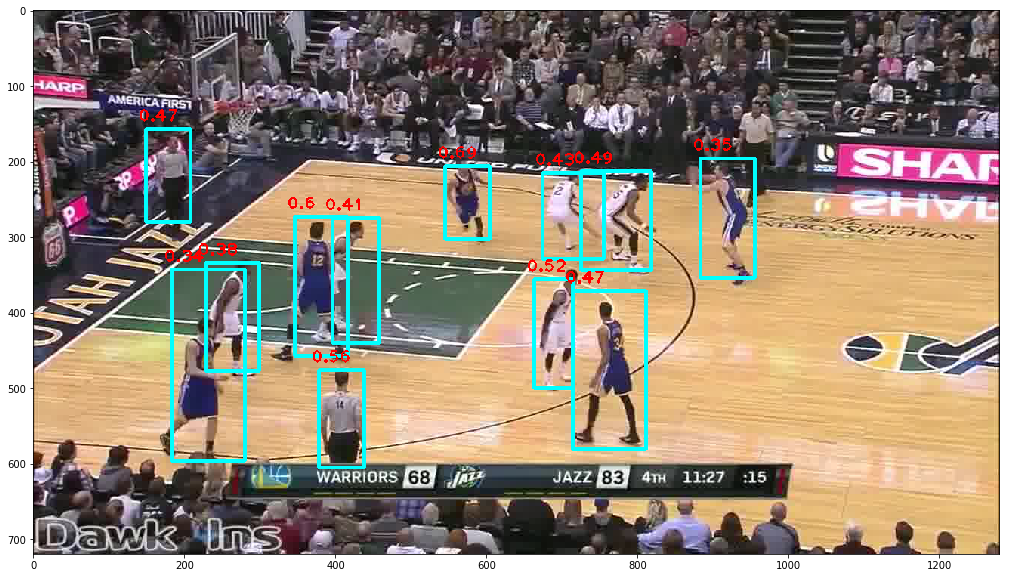

In [59]:
dir_name = 'warrior_vs_jazz'
img_name = 'output046'
img_folder = 'out_0.3'
img_file = os.path.join(dir_name,'{}.jpg'.format(img_name))
json_file = os.path.join(dir_name,img_folder,'{}.json'.format(img_name))

result = json.load(open(json_file))
image = io.imread(img_file)
for box in result:
    left = box['topleft']['x']
    top = box['topleft']['y']
    right = box['bottomright']['x']
    bottom = box['bottomright']['y']
    label = box['label']
    confidence = box['confidence']
    w = right - left
    h = bottom - top
    
    
    if h < 260 and h > 80 and w < 150 and label=='person':
        print(box)
        print('width : {}, height : {}'.format(w,h))
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 255), 3)
        # show the face number
        cv2.putText(image, "{}".format(confidence), (left - 10, top - 10),
                    cv2.FONT_HERSHEY_PLAIN, 1.5, (255, 0, 0), 2)
    
    
plt.figure(figsize = (20,10))
plt.imshow(image)
plt.show()


In [60]:
dir_name = 'warrior_vs_jazz'
for i in range(2,103):
    
    img_name = 'output{:03d}'.format(i)
    img_folder = 'out_0.3'
    img_file = os.path.join(dir_name,'{}.jpg'.format(img_name))
    json_file = os.path.join(dir_name,img_folder,'{}.json'.format(img_name))

    result = json.load(open(json_file))
    image = io.imread(img_file)
    new_result = []
    for box in result:
        left = box['topleft']['x']
        top = box['topleft']['y']
        right = box['bottomright']['x']
        bottom = box['bottomright']['y']
        label = box['label']
        confidence = box['confidence']
        w = right - left
        h = bottom - top


        if h < 260 and h > 80 and w < 150 and label=='person':
            cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 255), 3)
            # show the face number
            cv2.putText(image, "{}".format(confidence), (left - 10, top - 10),
                        cv2.FONT_HERSHEY_PLAIN, 1.5, (255, 0, 0), 2)
            new_result.append(box)
    
    print(len(result))
    print(len(new_result))
    save_folder = 'result'
    save_img_file = os.path.join(dir_name,save_folder,'{}.jpg'.format(img_name))
    save_json_file = os.path.join(dir_name,save_folder,'{}.json'.format(img_name))
    scipy.misc.imsave(save_img_file,image)
    json.dump(new_result, open(save_json_file,'w'))

19
11
17
11
18
12
19
12
19
12
19
13
17
10
19
10
22
13
20
13
20
12
20
12
20
12
20
11
21
12
22
12
20
13
17
12
15
11
17
14
16
12
17
12
18
15
20
15
18
13
15
11
14
12
18
13
15
12
16
11
17
11
16
11
16
13
16
13
15
13
16
11
15
12
18
14
19
16
17
14
18
14
17
14
17
12
16
11
17
12
13
10
12
9
17
13
17
13
17
11
17
10
14
6
20
12
20
12
15
9
13
7
12
8
16
8
18
11
23
14
22
15
18
15
12
7
17
11
20
14
20
18
17
14
17
13
17
13
19
15
19
15
16
13
21
17
20
16


FileNotFoundError: [Errno 2] No such file or directory: 'warrior_vs_jazz/out_0.3/output076.json'